In [1]:
from pathlib import Path
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
indir = Path("data/section_one/s2")

In [3]:
indir.is_dir()

True

In [4]:
!ls data/section_one/s2

input        manifest.csv output       raw_obits


In [5]:
manifest = pd.read_csv(indir / "manifest.csv", index_col = 0)
manifest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 378
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       379 non-null    object
 1   year       379 non-null    int64 
 2   file_name  379 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [6]:
manifest.tail(5)

,name,year,file_name
374,King Hussein,1999,374.txt
375,Pierre Trudeau,2000,375.txt
376,Elliot Richardson,2000,376.txt
377,Charles M Schulz,2000,377.txt
378,Karen Sparck Jones,2007,378.txt


In [7]:
corpus = []
for idx in manifest.index:
    fname = manifest.loc[idx, "file_name"]
    path = indir / f"input/{fname}"
    with path.open("r") as fin:
        doc = fin.read()
        corpus.append(doc)

In [8]:
assert len(corpus) == len(manifest), "Lengths don't match!"

In [9]:
len(corpus)

379

In [10]:
corpus[0]

'gifted mathematician recognize computer programmer claire cain miller century dawn computer age ada lovelace imagine modern day general purpose computer program follow instruction write just calculate create weave algebraic pattern just jacquard loom weave flower leaves computer write british inventor charles babbage analytical engine build writing compute earn lovelace die uterine cancer recognition computer programmer program write analytical engine calculate seventh bernoulli number bernoulli number swiss mathematician jacob bernoulli use different area mathematics deep influence potential compute machine beyond calculate number say understand symbol use create music art insight become core concept digital age walter isaacson write book innovators piece content data information music text picture number symbol sound video express digital form manipulate machines explore ramification computer write responsibility place person program machine raise dismiss notion computer someday thi

In [11]:
count_vectorizer = CountVectorizer()

In [12]:
vectorized = count_vectorizer.fit_transform(corpus)

In [13]:
vectorized

<379x31165 sparse matrix of type '<class 'numpy.int64'>'
	with 248411 stored elements in Compressed Sparse Row format>

In [14]:
count_vectorizer.get_feature_names_out()

array(['aachen', 'aahs', 'aane', ..., 'zurich', 'zvai', 'zwilich'],
      dtype=object)

In [15]:
dtm = pd.DataFrame(
    vectorized.toarray(),
    columns = count_vectorizer.get_feature_names_out(),
    index = manifest["name"]
)

In [16]:
np.array((0, 1, 2, 3))[-1]

3

In [17]:
dtm

,aachen,aahs,aane,aarau,aaron,aau,aaugh,aayega,aba,ababa,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
name,,,,,,,,,,,,,,,,,,,,,
Ada Lovelace,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Robert E Lee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew Johnson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bedford Forrest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lucretia Mott,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
King Hussein,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pierre Trudeau,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Elliot Richardson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dtm.loc["Miles Davis"].sort_values(ascending = False)

davis          44
jazz           20
music          17
bop            13
new            12
               ..
flamealso       0
flame           0
flamboyance     0
flak            0
zwilich         0
Name: Miles Davis, Length: 31165, dtype: int64

In [19]:
def plot_metrics(data, col, title = "", xlabel = ""):
    """Plot a histogram for a metric."""
    fig, ax = plt.subplots(figsize = (9, 6))
    g = sns.histplot(data = data, x = col)
    g.set(title = title, xlabel = xlabel, ylabel = "Count");

In [20]:
manifest

,name,year,file_name
0,Ada Lovelace,1852,000.txt
1,Robert E Lee,1870,001.txt
2,Andrew Johnson,1875,002.txt
3,Bedford Forrest,1877,003.txt
4,Lucretia Mott,1880,004.txt
...,...,...,...
374,King Hussein,1999,374.txt
375,Pierre Trudeau,2000,375.txt
376,Elliot Richardson,2000,376.txt
377,Charles M Schulz,2000,377.txt


In [21]:
manifest.loc[:, "num_tokens"] = dtm.apply(sum, axis = 1).values

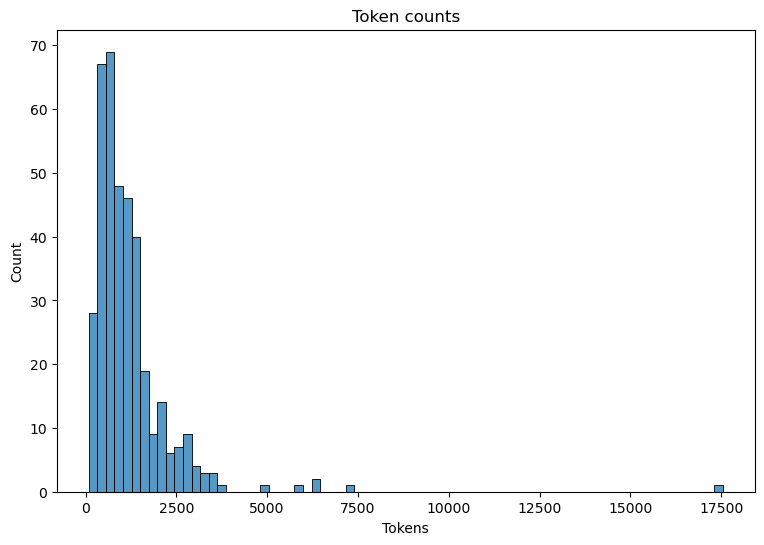

In [22]:
plot_metrics(
    manifest, "num_tokens", title = "Token counts", xlabel = "Tokens"
)

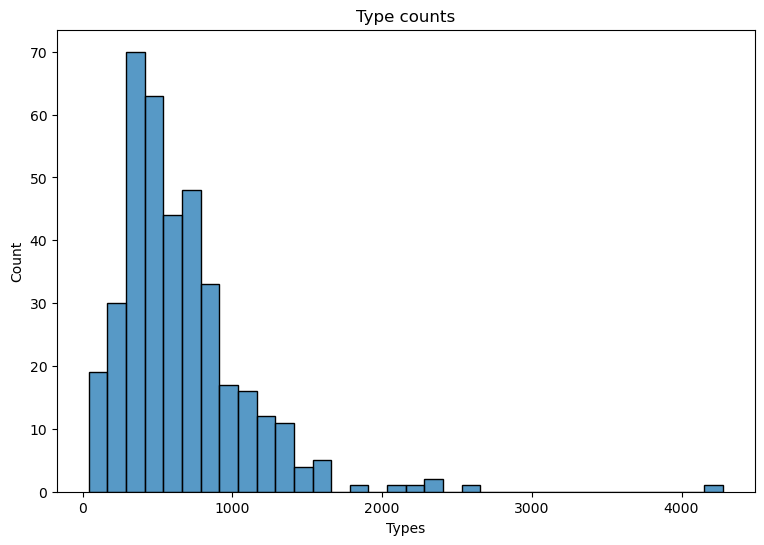

In [23]:
manifest.loc[:, "num_types"] = dtm.apply(np.count_nonzero, axis = 1).values
plot_metrics(
    manifest, "num_types", title = "Type counts", xlabel = "Types"
)

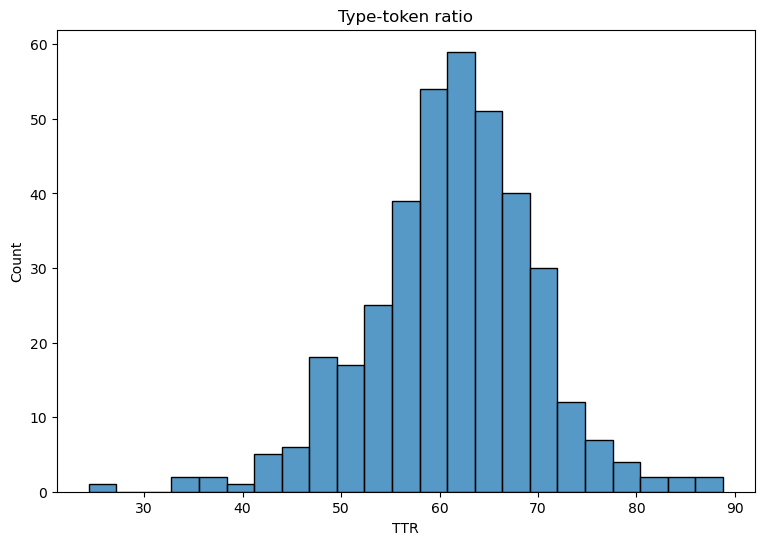

In [24]:
# Type-token ratio
manifest.loc[:, "TTR"] = (manifest["num_types"] / manifest["num_tokens"]) * 100
plot_metrics(
    manifest, "TTR", title = "Type-token ratio", xlabel = "TTR"
)

In [25]:
manifest.sort_values("TTR", ascending = False)

,name,year,file_name,num_tokens,num_types,TTR
152,Beno Gutenberg,1960,152.txt,98,87,88.775510
39,Hilaire G E Degas,1917,039.txt,88,78,88.636364
15,Nietzsche,1900,015.txt,163,138,84.662577
44,Nellie Bly,1922,044.txt,179,151,84.357542
31,John P Holland,1914,031.txt,88,73,82.954545
...,...,...,...,...,...,...
97,Adolf Hitler,1945,097.txt,6327,2366,37.395290
17,Queen Victoria,1901,017.txt,7206,2569,35.650847
68,Adolph S Ochs,1935,068.txt,6439,2201,34.182326
84,Lou Gehrig,1941,084.txt,118,40,33.898305


In [26]:
# TF-IDF
# term-frequency, inverse document-frequency

In [27]:
TF = dtm.div(dtm.sum(axis = 1), axis = 0)
TF

,aachen,aahs,aane,aarau,aaron,aau,aaugh,aayega,aba,ababa,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
name,,,,,,,,,,,,,,,,,,,,,
Ada Lovelace,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Robert E Lee,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Andrew Johnson,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bedford Forrest,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Lucretia Mott,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
King Hussein,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Pierre Trudeau,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Elliot Richardson,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [28]:
N = len(dtm)
DF = (dtm > 0).sum(axis = 0)
IDF = np.log(1 + N / (1 + DF)) + 1

In [29]:
TFIDF = TF.multiply(IDF, axis = 1)
TFIDF

,aachen,aahs,aane,aarau,aaron,aau,aaugh,aayega,aba,ababa,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
name,,,,,,,,,,,,,,,,,,,,,
Ada Lovelace,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Robert E Lee,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Andrew Johnson,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Bedford Forrest,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Lucretia Mott,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
King Hussein,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Pierre Trudeau,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Elliot Richardson,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [30]:
tfidf_vectorizer = TfidfVectorizer()
vectorized_tfidf = tfidf_vectorizer.fit_transform(corpus)

In [31]:
tfidf = pd.DataFrame(
    vectorized_tfidf.toarray(),
    columns = tfidf_vectorizer.get_feature_names_out(),
    index = manifest["name"]
)

In [32]:
tfidf.loc["Miles Davis"].sort_values(ascending = False).head(25)

davis        0.590932
jazz         0.288212
bop          0.248694
album        0.191389
quintet      0.183772
music        0.155390
miles        0.130332
rock         0.120028
trumpeter    0.111713
saxophone    0.111713
bass         0.111713
parker       0.108588
harmony      0.090654
musician     0.087177
record       0.076827
band         0.074724
cool         0.072868
harmonic     0.069596
style        0.067808
modal        0.067127
group        0.066519
coltrane     0.063822
funk         0.063822
trumpet      0.062926
solo         0.061222
Name: Miles Davis, dtype: float64

In [33]:
def counts_vs_tfidf(dtm, tfidf, idx, n_terms = 10):
    c = dtm.loc[idx].nlargest(n_terms)
    t = tfidf.loc[idx].nlargest(n_terms)
    df = pd.DataFrame({
        "count_term": c.index, "count": c.values,
        "tfidf_term": t.index, "tfidf": t.values
    })

    return df

In [34]:
for name in manifest["name"].sample(5):
    comparison = counts_vs_tfidf(dtm, tfidf, name)
    print("Person:", name)
    display(comparison)

Person: Ernest Hemingway


,count_term,count,tfidf_term,tfidf
0,hemingway,46,hemingway,0.828944
1,man,15,writer,0.075933
2,write,15,eastman,0.075902
3,great,13,man,0.075010
4,year,11,write,0.072593
5,writer,10,rises,0.071206
6,life,8,paris,0.068354
7,paris,8,fishing,0.067710
8,publish,8,great,0.061732
9,work,8,hunt,0.055386


Person: The Duke of Windsor


,count_term,count,tfidf_term,tfidf
0,duke,26,duke,0.583157
1,edward,17,edward,0.288428
2,later,11,simpson,0.264890
3,king,10,windsor,0.202852
4,home,9,queen,0.177205
5,queen,9,king,0.154022
6,mrs,8,viii,0.144894
7,simpson,8,abdicate,0.127124
8,paris,7,duchess,0.119100
9,royal,7,prince,0.117208


Person: Joe Louis


,count_term,count,tfidf_term,tfidf
0,louis,81,louis,0.622665
1,round,25,schmeling,0.284329
2,fight,16,heavyweight,0.230425
3,joe,16,round,0.225287
4,bout,15,bout,0.199135
5,knock,15,knock,0.179529
6,schmeling,15,joe,0.175162
7,champion,14,baer,0.141800
8,heavyweight,13,champion,0.129494
9,time,13,boxing,0.115132


Person: Pablo Picasso


,count_term,count,tfidf_term,tfidf
0,picasso,130,picasso,0.860388
1,work,37,painter,0.108077
2,say,32,paint,0.106247
3,art,31,painting,0.106247
4,artist,28,art,0.091932
5,time,28,artist,0.091380
6,year,28,cubism,0.076554
7,paint,24,pablo,0.074802
8,painting,24,gilot,0.071585
9,life,23,guernica,0.071585


Person: John Dulles


,count_term,count,tfidf_term,tfidf
0,dulles,83,dulles,0.849705
1,united,33,foster,0.129925
2,states,26,foreign,0.109129
3,state,22,united,0.101625
4,foreign,21,policy,0.089140
5,president,21,states,0.083329
6,policy,17,grandfather,0.082949
7,foster,16,state,0.081667
8,year,15,president,0.070723
9,secretary,14,conference,0.065620


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
# Document similarity
cos_sim = cosine_similarity(tfidf)
cos_sim = pd.DataFrame(cos_sim, columns = tfidf.index, index = tfidf.index)

/Users/tyler/.mambaforge/envs/nlp_workshop/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [37]:
cos_sim

name,Ada Lovelace,Robert E Lee,Andrew Johnson,Bedford Forrest,Lucretia Mott,Charles Darwin,Ulysses Grant,Mary Ewing Outerbridge,Emma Lazarus,Louisa M Alcott,...,Bella Abzug,Fred W Friendly,Frank Sinatra,Hassan II,Iris Murdoch,King Hussein,Pierre Trudeau,Elliot Richardson,Charles M Schulz,Karen Sparck Jones
name,,,,,,,,,,,,,,,,,,,,,
Ada Lovelace,1.000000,0.019804,0.026482,0.019349,0.018810,0.033630,0.046061,0.018233,0.034250,0.021197,...,0.020036,0.026420,0.019664,0.025639,0.043310,0.023598,0.019965,0.017129,0.017886,0.171449
Robert E Lee,0.019804,1.000000,0.141180,0.159599,0.028449,0.032795,0.411820,0.022179,0.046752,0.040320,...,0.027117,0.032772,0.026631,0.062267,0.040633,0.037736,0.033836,0.059905,0.021260,0.020772
Andrew Johnson,0.026482,0.141180,1.000000,0.100110,0.058495,0.058852,0.305648,0.036523,0.052071,0.040667,...,0.085445,0.056150,0.044691,0.092066,0.049519,0.050098,0.064359,0.093236,0.038053,0.030811
Bedford Forrest,0.019349,0.159599,0.100110,1.000000,0.018358,0.035391,0.254884,0.013368,0.037530,0.031363,...,0.025530,0.039693,0.021363,0.048961,0.026128,0.030040,0.023765,0.025906,0.018550,0.016194
Lucretia Mott,0.018810,0.028449,0.058495,0.018358,1.000000,0.026777,0.045798,0.021447,0.021968,0.038574,...,0.026876,0.013425,0.021223,0.019825,0.025500,0.010243,0.019970,0.026439,0.012882,0.023468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
King Hussein,0.023598,0.037736,0.050098,0.030040,0.010243,0.026879,0.082379,0.017393,0.044634,0.019232,...,0.035752,0.021455,0.021813,0.334771,0.031439,1.000000,0.043380,0.031187,0.022704,0.018842
Pierre Trudeau,0.019965,0.033836,0.064359,0.023765,0.019970,0.033298,0.075161,0.017359,0.028846,0.021053,...,0.038768,0.032137,0.028407,0.068507,0.037941,0.043380,1.000000,0.039074,0.028923,0.023142
Elliot Richardson,0.017129,0.059905,0.093236,0.025906,0.026439,0.034712,0.114284,0.019761,0.020961,0.062389,...,0.045902,0.030167,0.024058,0.035505,0.044018,0.031187,0.039074,1.000000,0.021916,0.018555


In [38]:
# Term similarity
term_cosine = cosine_similarity(tfidf.T)
term_cosine = pd.DataFrame(term_cosine, columns = tfidf.columns, index = tfidf.columns)
term_cosine

/Users/tyler/.mambaforge/envs/nlp_workshop/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,aachen,aahs,aane,aarau,aaron,aau,aaugh,aayega,aba,ababa,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
aachen,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
aahs,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
aane,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
aarau,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488822,0.0,0.0
aaron,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zula,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
zululand,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
zurich,0.0,0.0,0.0,0.488822,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
zvai,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0


In [39]:
np.linalg.norm(dtm.loc["Ada Lovelace"])

38.43175770115127

In [40]:
vec = dtm.loc["Ada Lovelace"]
np.sqrt(np.sum(np.square(vec)))

38.43175770115127

In [41]:
cos_sim.loc["Ada Lovelace"].nlargest(5)

name
Ada Lovelace          1.000000
Karen Sparck Jones    0.171449
Jan Tinbergen         0.062215
Albert Einstein       0.061381
Isaac Asimov          0.059103
Name: Ada Lovelace, dtype: float64

In [42]:
cos_sim.loc["FDR"].nlargest(5)

name
FDR                    1.000000
Eleanor Roosevelt      0.506505
Alfred E Smith         0.302997
William Howard Taft    0.200515
Harry S Truman         0.165723
Name: FDR, dtype: float64

In [43]:
cos_sim

name,Ada Lovelace,Robert E Lee,Andrew Johnson,Bedford Forrest,Lucretia Mott,Charles Darwin,Ulysses Grant,Mary Ewing Outerbridge,Emma Lazarus,Louisa M Alcott,...,Bella Abzug,Fred W Friendly,Frank Sinatra,Hassan II,Iris Murdoch,King Hussein,Pierre Trudeau,Elliot Richardson,Charles M Schulz,Karen Sparck Jones
name,,,,,,,,,,,,,,,,,,,,,
Ada Lovelace,1.000000,0.019804,0.026482,0.019349,0.018810,0.033630,0.046061,0.018233,0.034250,0.021197,...,0.020036,0.026420,0.019664,0.025639,0.043310,0.023598,0.019965,0.017129,0.017886,0.171449
Robert E Lee,0.019804,1.000000,0.141180,0.159599,0.028449,0.032795,0.411820,0.022179,0.046752,0.040320,...,0.027117,0.032772,0.026631,0.062267,0.040633,0.037736,0.033836,0.059905,0.021260,0.020772
Andrew Johnson,0.026482,0.141180,1.000000,0.100110,0.058495,0.058852,0.305648,0.036523,0.052071,0.040667,...,0.085445,0.056150,0.044691,0.092066,0.049519,0.050098,0.064359,0.093236,0.038053,0.030811
Bedford Forrest,0.019349,0.159599,0.100110,1.000000,0.018358,0.035391,0.254884,0.013368,0.037530,0.031363,...,0.025530,0.039693,0.021363,0.048961,0.026128,0.030040,0.023765,0.025906,0.018550,0.016194
Lucretia Mott,0.018810,0.028449,0.058495,0.018358,1.000000,0.026777,0.045798,0.021447,0.021968,0.038574,...,0.026876,0.013425,0.021223,0.019825,0.025500,0.010243,0.019970,0.026439,0.012882,0.023468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
King Hussein,0.023598,0.037736,0.050098,0.030040,0.010243,0.026879,0.082379,0.017393,0.044634,0.019232,...,0.035752,0.021455,0.021813,0.334771,0.031439,1.000000,0.043380,0.031187,0.022704,0.018842
Pierre Trudeau,0.019965,0.033836,0.064359,0.023765,0.019970,0.033298,0.075161,0.017359,0.028846,0.021053,...,0.038768,0.032137,0.028407,0.068507,0.037941,0.043380,1.000000,0.039074,0.028923,0.023142
Elliot Richardson,0.017129,0.059905,0.093236,0.025906,0.026439,0.034712,0.114284,0.019761,0.020961,0.062389,...,0.045902,0.030167,0.024058,0.035505,0.044018,0.031187,0.039074,1.000000,0.021916,0.018555


In [44]:
from sklearn.manifold import TSNE

In [45]:
reducer = TSNE(
    n_components = 2,
    learning_rate = "auto",
    init = "random",
    angle = 0.35,
    random_state = 357,
    n_jobs = -1
)
reduced = reducer.fit_transform(cos_sim)

In [46]:
vis = pd.DataFrame({
    "x": reduced[:, 0], "y": reduced[:, 1], "label": cos_sim.index
})
vis

,x,y,label
0,-5.667405,-22.055941,Ada Lovelace
1,17.523876,-4.093035,Robert E Lee
2,30.610653,-5.328338,Andrew Johnson
3,16.307924,-4.079401,Bedford Forrest
4,11.019361,6.806565,Lucretia Mott
...,...,...,...
374,17.414997,-16.231552,King Hussein
375,16.210854,-8.548942,Pierre Trudeau
376,25.398350,-0.136635,Elliot Richardson
377,-12.283768,-7.722484,Charles M Schulz


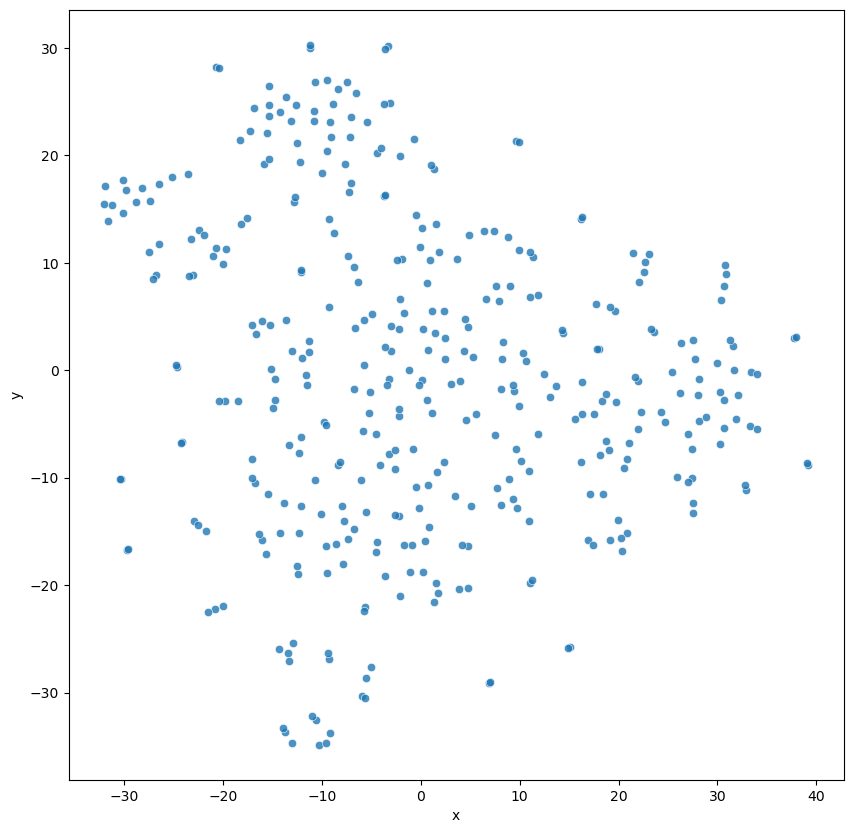

In [47]:
fig, ax = plt.subplots(figsize = (10, 10))
g = sns.scatterplot(
    data = vis, x = "x", y = "y", alpha = 0.8, ax = ax
)

In [48]:
# Topic modeling

In [49]:
from pathlib import Path
import numpy as np
import pandas as pd
import tomotopy as tp
from tomotopy.utils import Corpus
from tomotopy.coherence import Coherence
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis

In [50]:
indir = Path("data/section_one/s3")

In [51]:
manifest = pd.read_csv(indir.joinpath("manifest.csv"), index_col = 0)
manifest.loc[:, 'year'] = pd.to_datetime(manifest['pub_date']).dt.year
manifest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     1500 non-null   object
 1   title      1500 non-null   object
 2   genre      1500 non-null   object
 3   pub_date   1500 non-null   object
 4   isbn       1500 non-null   int64 
 5   file_name  1500 non-null   object
 6   year       1500 non-null   int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 87.9+ KB


In [52]:
corpus = Corpus()
for fname in manifest['file_name']:
    path = indir.joinpath(f"input/{fname}")
    with path.open('r') as fin:
        doc = fin.read()
        corpus.add_doc(doc.split())

In [53]:
seed = 357
model = tp.LDAModel(k = 5, corpus = corpus, seed = seed)

In [54]:
iters = 1000
model.train(iter = iters)

/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/3938478014.py:2: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(iter = iters)


In [55]:
def top_words(model, k):
    """Print the top words for topic k in a model."""
    top_words = model.get_topic_words(topic_id = k, top_n = 5)
    top_words = [f"{word} ({score:0.4f}%)" for (word, score) in top_words]
    print(f"Topic {k}: {', '.join(top_words)}")

for i in range(model.k):
    top_words(model, i)

Topic 0: history (0.0102%), world (0.0101%), story (0.0089%), american (0.0083%), new (0.0081%)
Topic 1: book (0.0130%), guide (0.0079%), use (0.0076%), life (0.0063%), include (0.0059%)
Topic 2: life (0.0194%), love (0.0107%), new (0.0090%), year (0.0090%), woman (0.0089%)
Topic 3: book (0.0154%), little (0.0081%), make (0.0078%), best (0.0068%), new (0.0068%)
Topic 4: new (0.0075%), world (0.0067%), city (0.0055%), mystery (0.0052%), murder (0.0048%)


In [56]:
def doc_topic_dist(model, idx):
    """Print the topic distribution for a document."""
    topics = model.docs[idx].get_topic_dist()
    for idx, prob in enumerate(topics):
        print(f"+ Topic #{idx}: {prob:0.2f}%")

random_title = manifest.sample().index.item()
doc_topic_dist(model, random_title)

+ Topic #0: 0.21%
+ Topic #1: 0.25%
+ Topic #2: 0.04%
+ Topic #3: 0.33%
+ Topic #4: 0.17%


In [59]:
sampled_titles = manifest.sample(5).index
for idx in sampled_titles:
    top_topics = model.docs[idx].get_topics(top_n = 1)
    topic, score = top_topics[0]
    print(f"{manifest.loc[idx, 'title']}: #{topic} ({score:0.2f}%)")

As Kingfishers Catch Fire: #2 (0.52%)
The Pacific War 1931-1945: #4 (0.29%)
What Was the Ice Age?: #1 (0.34%)
Encaustic Art: #1 (0.67%)
The Heart of Business: #1 (0.54%)


In [60]:
doc = model.docs[random_title]
word_to_topic = list(zip(doc, doc.topics))
for word in range(10):
    word, topic = word_to_topic[word]
    print(f"+ {word} ({topic})")

+ travel (1)
+ writer (0)
+ describe (1)
+ detail (0)
+ world (4)
+ singular (4)
+ offbeat (3)
+ travel (3)
+ adventure (3)
+ paddle (3)


In [63]:
model10 = tp.LDAModel(k = 10, corpus = corpus, seed = seed)
model10.train(iter = iters)

for k in range(model10.k):
    top_words(model10, k)

Topic 0: book (0.0278%), story (0.0143%), little (0.0117%), child (0.0112%), reader (0.0105%)
Topic 1: war (0.0182%), political (0.0127%), world (0.0108%), america (0.0103%), power (0.0099%)
Topic 2: new (0.0222%), life (0.0204%), story (0.0179%), world (0.0120%), great (0.0117%)
Topic 3: work (0.0147%), history (0.0107%), art (0.0106%), volume (0.0105%), classic (0.0099%)
Topic 4: secret (0.0119%), man (0.0087%), new (0.0086%), mystery (0.0083%), murder (0.0077%)
Topic 5: book (0.0150%), life (0.0100%), use (0.0084%), help (0.0066%), include (0.0062%)
Topic 6: world (0.0105%), battle (0.0076%), new (0.0067%), star (0.0059%), tale (0.0054%)
Topic 7: life (0.0248%), love (0.0226%), woman (0.0178%), family (0.0146%), year (0.0129%)
Topic 8: food (0.0157%), recipe (0.0137%), guide (0.0131%), new (0.0082%), top (0.0078%)
Topic 9: make (0.0140%), just (0.0126%), new (0.0110%), time (0.0110%), like (0.0101%)


/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/3109770248.py:2: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model10.train(iter = iters)


In [61]:
model30 = tp.LDAModel(k = 30, corpus = corpus, seed = seed)
model30.train(iter = iters)

for k in range(model30.k):
    top_words(model30, k)

Topic 0: recipe (0.0313%), food (0.0255%), family (0.0142%), italian (0.0128%), meal (0.0106%)
Topic 1: new (0.0276%), make (0.0178%), just (0.0175%), time (0.0141%), like (0.0140%)
Topic 2: life (0.0384%), love (0.0193%), year (0.0189%), family (0.0185%), old (0.0126%)
Topic 3: book (0.0363%), new (0.0302%), times (0.0277%), york (0.0251%), story (0.0214%)
Topic 4: history (0.0253%), american (0.0189%), year (0.0171%), story (0.0169%), great (0.0166%)
Topic 5: school (0.0259%), kid (0.0178%), little (0.0176%), animal (0.0170%), child (0.0167%)
Topic 6: music (0.0360%), japanese (0.0207%), tale (0.0153%), junie (0.0094%), rock (0.0094%)
Topic 7: art (0.0295%), artist (0.0181%), work (0.0172%), president (0.0123%), portrait (0.0115%)
Topic 8: book (0.0252%), guide (0.0192%), use (0.0177%), learn (0.0167%), step (0.0155%)
Topic 9: mystery (0.0246%), murder (0.0244%), killer (0.0129%), police (0.0117%), dead (0.0114%)
Topic 10: city (0.0265%), rule (0.0091%), old (0.0087%), light (0.0084%

/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/812679739.py:2: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model30.train(iter = iters)


In [64]:
for m in (model10, model30):
    print(f"Perplexity for the {m.k}-topic model: {m.perplexity:0.4f}")

Perplexity for the 10-topic model: 10777.7660
Perplexity for the 30-topic model: 10449.8925


In [65]:
k_range = range(10, 31)
p_scores = []
for k in k_range:
    _model = tp.LDAModel(k = k, corpus = corpus, seed = seed)
    _model.train(iter = iters)
    p_scores.append({'n_topics': k, 'perplexity': _model.perplexity})

/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/2440348067.py:5: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  _model.train(iter = iters)


In [66]:
p_scores = pd.DataFrame(p_scores)
p_scores.sort_values('perplexity', inplace = True)
p_scores

,n_topics,perplexity
19,29,10259.426721
8,18,10356.584460
13,23,10443.413781
20,30,10449.892548
5,15,10458.080301
16,26,10469.298786
14,24,10476.101149
11,21,10557.088274
12,22,10599.010769
17,27,10614.836784


In [67]:
best_k = p_scores.nsmallest(1, 'perplexity')['n_topics'].item()
best_p = tp.LDAModel(k = best_k, corpus = corpus, seed = seed)
best_p.train(iter = iters)

/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/546796989.py:3: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  best_p.train(iter = iters)


In [68]:
for k in range(best_p.k):
    top_words(best_p, k)

Topic 0: emma (0.0151%), sin (0.0120%), roy (0.0113%), sheriff (0.0090%), alpine (0.0075%)
Topic 1: new (0.0199%), make (0.0176%), just (0.0152%), like (0.0142%), time (0.0131%)
Topic 2: horse (0.0234%), tale (0.0178%), wild (0.0132%), animal (0.0127%), weird (0.0122%)
Topic 3: story (0.0255%), volume (0.0169%), collection (0.0162%), include (0.0154%), book (0.0133%)
Topic 4: music (0.0262%), film (0.0157%), star (0.0138%), movie (0.0131%), thomas (0.0105%)
Topic 5: guide (0.0280%), travel (0.0156%), new (0.0124%), history (0.0124%), cover (0.0115%)
Topic 6: health (0.0189%), body (0.0160%), weight (0.0127%), healthy (0.0113%), program (0.0098%)
Topic 7: dead (0.0153%), vampire (0.0112%), john (0.0108%), death (0.0108%), cole (0.0099%)
Topic 8: recipe (0.0315%), food (0.0275%), italian (0.0147%), family (0.0117%), meal (0.0106%)
Topic 9: business (0.0201%), financial (0.0137%), money (0.0137%), new (0.0127%), success (0.0121%)
Topic 10: murder (0.0293%), mystery (0.0266%), police (0.01

In [69]:
best_p_coherence = Coherence(best_p, coherence = 'c_v')
print(f"Coherence score: {best_p_coherence.get_score():0.4f}")

Coherence score: 0.6988


In [70]:
c_scores = []
for k in k_range:
    _model = tp.LDAModel(k = k, corpus = corpus, seed = seed)
    _model.train(iter = iters)
    coherence = Coherence(_model, coherence = 'c_v')
    c_scores.append({'n_topics': k, 'coherence': coherence.get_score()})

/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/1287490975.py:4: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  _model.train(iter = iters)


In [71]:
c_scores = pd.DataFrame(c_scores)
c_scores.sort_values('coherence', ascending = False, inplace = True)
c_scores.head(10)

,n_topics,coherence
20,30,0.700868
19,29,0.698793
14,24,0.690023
16,26,0.689783
17,27,0.682885
15,25,0.670136
11,21,0.648808
13,23,0.645939
18,28,0.641926
10,20,0.638035


In [72]:
best_k = c_scores.nlargest(1, 'coherence')['n_topics'].item()
best_c = tp.LDAModel(k = best_k, corpus = corpus, seed = seed)
best_c.train(iter = iters)

/var/folders/h7/tzxfms7d2z7gwlgtbvw15msc0000gn/T/ipykernel_15378/2978672240.py:3: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  best_c.train(iter = iters)


In [73]:
for k in range(best_c.k):
    top_words(best_c, k)

Topic 0: recipe (0.0313%), food (0.0255%), family (0.0142%), italian (0.0128%), meal (0.0106%)
Topic 1: new (0.0276%), make (0.0178%), just (0.0175%), time (0.0141%), like (0.0140%)
Topic 2: life (0.0384%), love (0.0193%), year (0.0189%), family (0.0185%), old (0.0126%)
Topic 3: book (0.0363%), new (0.0302%), times (0.0277%), york (0.0251%), story (0.0214%)
Topic 4: history (0.0253%), american (0.0189%), year (0.0171%), story (0.0169%), great (0.0166%)
Topic 5: school (0.0259%), kid (0.0178%), little (0.0176%), animal (0.0170%), child (0.0167%)
Topic 6: music (0.0360%), japanese (0.0207%), tale (0.0153%), junie (0.0094%), rock (0.0094%)
Topic 7: art (0.0295%), artist (0.0181%), work (0.0172%), president (0.0123%), portrait (0.0115%)
Topic 8: book (0.0252%), guide (0.0192%), use (0.0177%), learn (0.0167%), step (0.0155%)
Topic 9: mystery (0.0246%), murder (0.0244%), killer (0.0129%), police (0.0117%), dead (0.0114%)
Topic 10: city (0.0265%), rule (0.0091%), old (0.0087%), light (0.0084%

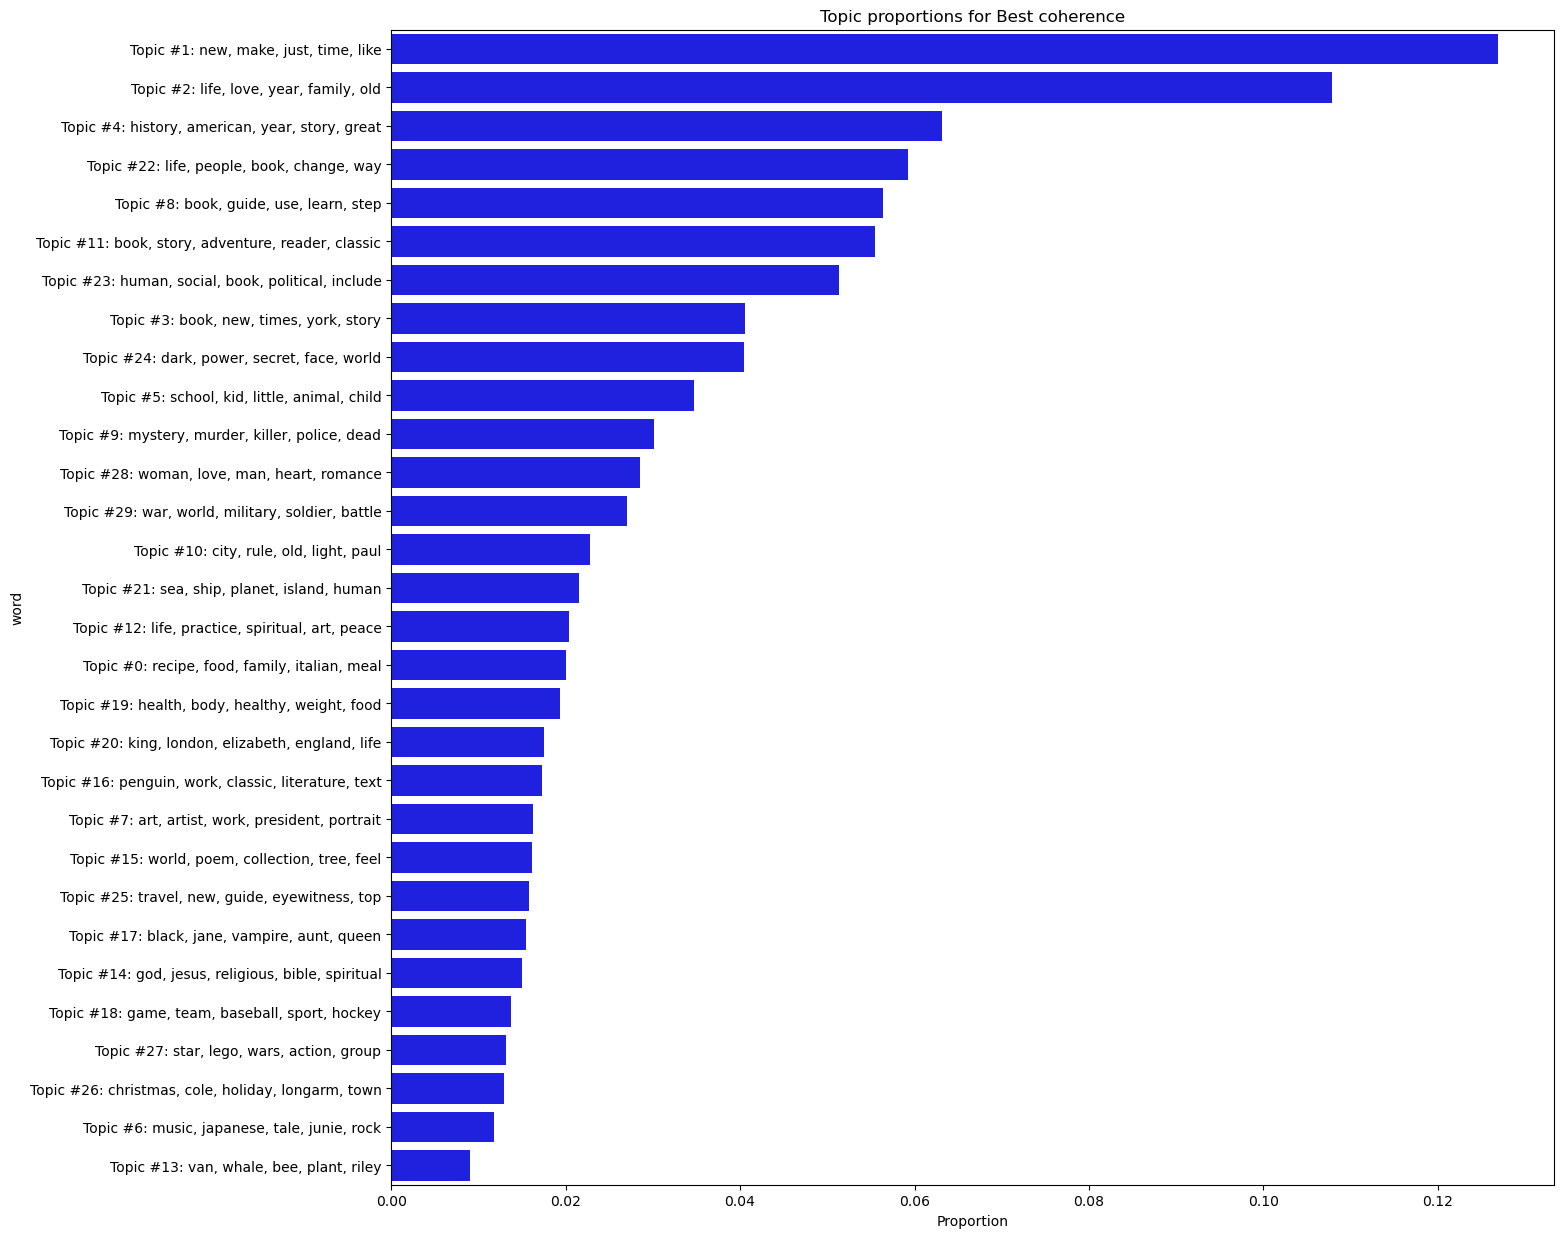

In [74]:
def format_top_words(tm, k, top_n = 5):
    """Get a formatted string of the top words for a topic."""
    words = tm.get_topic_words(k, top_n = top_n)
    
    return f"Topic #{k}: {', '.join(word for (word, _) in words)}"

def plot_topic_proportions(tm, name = '', top_n = 5):
    """Plot the topic proportions for a model."""
    dists = tm.get_count_by_topics() / tm.num_words
    words = [format_top_words(tm, k, top_n) for k in range(tm.k)]
    data = pd.DataFrame(zip(words, dists), columns = ('word', 'dist'))
    data.sort_values('dist', ascending = False, inplace = True)

    fig, ax = plt.subplots(figsize = (15, 15))
    g = sns.barplot(x = 'dist', y = 'word', color = 'blue', data = data)
    g.set(title = f"Topic proportions for {name}", xlabel = "Proportion");

plot_topic_proportions(best_c, name = 'Best coherence')